In [19]:
import spacy
import nltk
import pandas as pd

In [15]:
#initialize spacy english model, keeping only the component needed for lemmatization and creating an engine
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [92]:
#reading from CSV file
data = pd.read_csv('crypto_dataset.csv')

## Tokenization

In [26]:
text = data.iloc[1]['body']

In [30]:
print(text)

The reviews have been mixed: while some say it's a film 'you can't resist,' others describe it as just 'razzle-dazzle' utilized to 'deflect from an emptiness of insight.\x9d


In [33]:
print([str(token) for token in nlp(text) if not token.is_punct])

['The', 'reviews', 'have', 'been', 'mixed', 'while', 'some', 'say', 'it', "'s", 'a', 'film', 'you', 'ca', "n't", 'resist', 'others', 'describe', 'it', 'as', 'just', 'razzle', 'dazzle', 'utilized', 'to', 'deflect', 'from', 'an', 'emptiness', 'of', 'insight.\\x9d']


the next step is to remove useless information

In [37]:
import re

#tokenization and remove punctuations
words = [str(token) for token in nlp(text) if not token.is_punct]

#remove digits and other symbols except "@" -- used to remove email
words = [re.sub(r"[^A-Za-z@]", "", word) for word in words]

#remove websites and email adresses
words = [re.sub(r"\S+com", "", word) for word in words]
words = [re.sub(r"\S+@\S+", "", word) for word in words]

#remove empty spaces
words = [word for word in words if word!='']

after the above transformations, the text should look like this

In [40]:
print(words)

['The', 'reviews', 'have', 'been', 'mixed', 'while', 'some', 'say', 'it', 's', 'a', 'film', 'you', 'ca', 'nt', 'resist', 'others', 'describe', 'it', 'as', 'just', 'razzle', 'dazzle', 'utilized', 'to', 'deflect', 'from', 'an', 'emptiness', 'of', 'insightxd']


remove the useless words named stopwords

In [47]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/iuliaion/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [50]:
#import other lists of stopword
with open('StopWords_GenericLong.txt', 'r') as f:
 x_gl = f.readlines()
with open('StopWords_Names.txt', 'r') as f:
 x_n = f.readlines()
with open('StopWords_DatesandNumbers.txt', 'r') as f:
 x_d = f.readlines()

#import nltk stopwords
stopwords = nltk.corpus.stopwords.words('english')

#combine all stopwords
[stopwords.append(x.rstrip()) for x in x_gl]
[stopwords.append(x.rstrip()) for x in x_n]
[stopwords.append(x.rstrip()) for x in x_d]

#change all stopwords into lowercase
stopwords_lower = [s.lower() for s in stopwords]

exclude the stopwords from the article

In [51]:
words = [word.lower() for word in words if word.lower() not in stopwords_lower]

In [52]:
print(words)

['reviews', 'mixed', 'film', 'ca', 'nt', 'resist', 'describe', 'razzle', 'dazzle', 'utilized', 'deflect', 'emptiness', 'insightxd']


In [56]:
def text_preprocessing(str_input): 
     #tokenization, remove punctuation, lemmatization
     words=[token.lemma_ for token in nlp(str_input) if not token.is_punct]
 
     # remove symbols, websites, email addresses 
     words = [re.sub(r"[^A-Za-z@]", "", word) for word in words] 
     words = [re.sub(r"\S+com", "", word) for word in words]
     words = [re.sub(r"\S+@\S+", "", word) for word in words] 
     words = [word for word in words if word!=' ']
     words = [word for word in words if len(word)!=0] 
 
     #remove stopwords     
     words=[word.lower() for word in words if word.lower() not in stopwords_lower]
     #combine a list into one string   
     string = " ".join(words)
     return string

testing for an articles from the dataset

In [58]:
test_text = data.iloc[5]['body']
print(test_text)

Viewers of the documentary, especially those aware of the whole saga, resonated with the conspiracy theory about the founder faking his death.


In [59]:
text_preprocessing(test_text)

'viewer documentary aware saga resonate conspiracy theory founder fake death'

applying the method on random articles from the dataset in order to test if it works

In [67]:
import random

index = random.randint(0, data.shape[0])

random_article = data.iloc[index]['body']
print('Article before pre-processing:\n'+ random_article)
print('\n')
print('Article after pre-processing:\n' + text_preprocessing(random_article))


Article before pre-processing:
The entire crypto market is green on Feb. 28, and derivatives metrics suggest that BTC's bullish reversal will flip $40,000 back to support.


Article after pre-processing:
entire crypto market derivative metric suggest btc bullish reversal flip support


In [146]:
#adding a new column into the dataset, containing the cleaned news
data['news_cleaned'] = data['body'].apply(text_preprocessing)
data.to_csv('crypto_dataset.csv', index=False)

In [188]:
data = pd.read_csv('crypto_dataset.csv')

if the sentiment is 
    - positive, the price will increase
    - neutral, the price will remain the same
    - negative, the price will decrease

In [136]:
sentiment = data.iloc[0]['sentiment']
#sentiment = data['sentiment'].tolist()
print(sentiment)

negative


modifing the price value based on the type of the sentiment

In [220]:
from matplotlib import pyplot as plt

#if sentiment = positive, then price = 1
data.loc[(data.sentiment.isin(['positive'])), 'price'] = 1

#if sentiment = neutral, then price = 0
data.loc[(data.sentiment.isin(['neutral'])), 'price'] = 0

#if sentiment = negative, then price = -1
data.loc[(data.sentiment.isin(['negative'])), 'price'] = -1

data.to_csv('crypto_dataset.csv', index=False)

showing price fluctuations

Price fluctuation:
       price
0        -1
1         0
2         1
3         1
4         0
...     ...
1481      1
1482      1
1483      0
1484     -1
1485      0

[1486 rows x 1 columns]


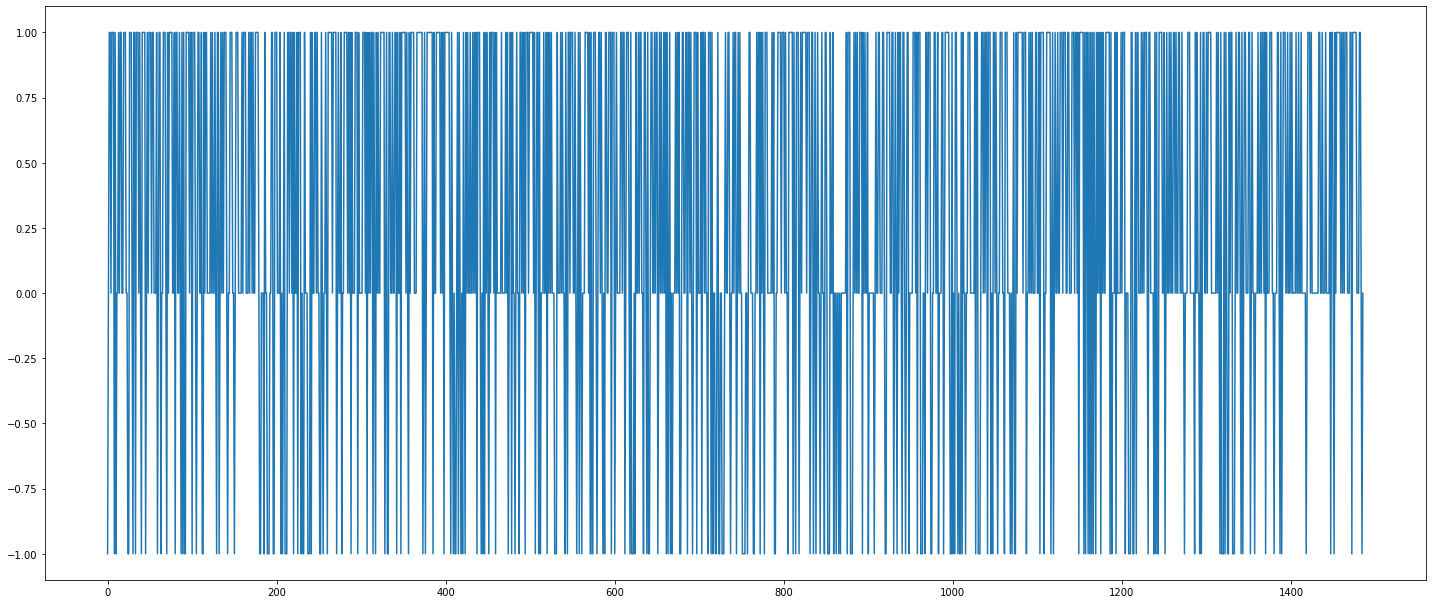

In [197]:
import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [20.00, 8.50]
plt.rcParams["figure.autolayout"] = True

column = ["price"]

df = pd.read_csv('crypto_dataset.csv', usecols=column)
print("Price fluctuation:\n", df)
plt.plot(df.price)
plt.show()

## Implementing Logistic Regression

In [219]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


#train and test split
X_train, X_test, y_train, y_test = train_test_split(data['news_cleaned'],
                                                    data['price'],
                                                    random_state=0)

vect = CountVectorizer(min_df=2, max_df=0.1).fit(X_train)
X_train_vectorized = vect.transform(X_train)
print('Number of features: {}'. format(len(vect.get_feature_names())))

#use logistic regression model to train
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

print('Accuracy:', accuracy_score(y_test, predictions))

Number of features: 1204
Accuracy: 0.5349462365591398


/usr/local/Cellar/jupyterlab/3.3.2/libexec/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
